In [0]:
import numpy as np
import pandas as pd

In [0]:
import os

In [3]:
from google.colab import drive
drive.mount('/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import os

In [0]:
os.chdir('/drive/My Drive/tensorflow')

In [0]:
df_train=pd.read_csv('hackathon_images_train.csv')

In [0]:
df_test=pd.read_csv('hackathon_images_test.csv')

In [9]:
df_train.head()

,Labels,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,Faces_easy,84.0,83.0,82.0,80.0,77.0,76.0,71.0,71.0,72.0,73.0,73.0,65.0,65.0,62.0,63.0,68.0,65.0,65.0,72.0,77.0,86.0,85.0,88.0,84.0,87.0,82.0,79.0,62.0,80.0,80.0,83.0,84.0,82.0,87.0,91.0,87.0,85.0,85.0,89.0,...,189.0,185.0,193.0,194.0,195.0,197.0,194.0,190.0,188.0,185.0,184.0,186.0,186.0,185.0,187.0,188.0,184.0,187.0,183.0,184.0,188.0,192.0,193.0,202.0,206.0,207.0,203.0,228.0,226.0,226.0,225.0,213.0,221.0,220.0,219.0,221.0,222.0,222.0,222.0,223.0
1,airplanes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,198.0,197.0,197.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,194.0,195.0,195.0,195.0,196.0,197.0,196.0,195.0,197.0,198.0,198.0,...,179.0,174.0,192.0,154.0,171.0,200.0,186.0,194.0,206.0,209.0,211.0,168.0,181.0,205.0,186.0,200.0,175.0,175.0,171.0,204.0,208.0,179.0,179.0,180.0,189.0,163.0,173.0,196.0,190.0,178.0,179.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,15.0,16.0,19.0,17.0,16.0,16.0,18.0,12.0,25.0,20.0,17.0,20.0,18.0,16.0,51.0,28.0,23.0,12.0,16.0,57.0,22.0,16.0,10.0,17.0,20.0,25.0,26.0,223.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,Leopards,2.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,6.0,2.0,3.0,0.0,2.0,2.0,...,18.0,24.0,24.0,19.0,24.0,15.0,20.0,16.0,22.0,16.0,25.0,18.0,20.0,25.0,26.0,21.0,22.0,20.0,23.0,18.0,20.0,21.0,17.0,22.0,16.0,22.0,12.0,14.0,19.0,18.0,17.0,18.0,13.0,17.0,19.0,14.0,20.0,11.0,2.0,5.0
4,Faces,125.0,123.0,123.0,120.0,120.0,116.0,114.0,114.0,115.0,99.0,63.0,183.0,185.0,188.0,191.0,197.0,199.0,193.0,195.0,203.0,202.0,205.0,208.0,210.0,209.0,209.0,210.0,217.0,217.0,218.0,217.0,220.0,221.0,219.0,214.0,213.0,209.0,218.0,223.0,...,193.0,190.0,192.0,195.0,185.0,189.0,187.0,171.0,187.0,187.0,196.0,187.0,186.0,173.0,183.0,183.0,172.0,180.0,181.0,175.0,173.0,172.0,169.0,166.0,164.0,152.0,140.0,135.0,84.0,86.0,104.0,123.0,123.0,102.0,139.0,116.0,100.0,112.0,118.0,139.0


In [10]:
df_test.head()

,Labels,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,Leopards,2.0,4.0,2.0,0.0,3.0,3.0,5.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,4.0,2.0,2.0,3.0,6.0,0.0,5.0,1.0,5.0
1,bonsai,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,116.0,192.0,223.0,161.0,143.0,135.0,70.0,195.0,153.0,146.0,171.0,242.0,81.0,161.0,89.0,150.0,201.0,242.0,93.0,153.0,156.0,124.0,246.0,136.0,205.0,252.0,251.0,251.0,253.0,253.0,253.0,254.0,255.0,255.0,255.0,254.0,255.0,255.0,255.0,141.0
2,Faces_easy,153.0,152.0,153.0,154.0,155.0,153.0,159.0,160.0,157.0,157.0,157.0,157.0,157.0,157.0,158.0,159.0,158.0,163.0,160.0,160.0,162.0,161.0,162.0,159.0,161.0,162.0,164.0,164.0,163.0,159.0,161.0,164.0,166.0,167.0,162.0,162.0,162.0,165.0,164.0,...,215.0,213.0,207.0,210.0,110.0,78.0,85.0,86.0,78.0,82.0,83.0,88.0,75.0,66.0,62.0,61.0,70.0,71.0,87.0,78.0,77.0,74.0,61.0,62.0,67.0,67.0,65.0,69.0,74.0,71.0,73.0,69.0,69.0,80.0,78.0,76.0,75.0,75.0,73.0,72.0
3,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,254.0,255.0,254.0,207.0,208.0,212.0,211.0,211.0,211.0,212.0,213.0,214.0,213.0,213.0,213.0,213.0,216.0,216.0,215.0,215.0,215.0,216.0,216.0,216.0,218.0,217.0,216.0,216.0,219.0,219.0,217.0,219.0,218.0,...,39.0,41.0,44.0,45.0,45.0,50.0,51.0,53.0,53.0,54.0,57.0,57.0,59.0,62.0,64.0,63.0,65.0,67.0,67.0,67.0,70.0,75.0,77.0,80.0,79.0,79.0,84.0,81.0,83.0,84.0,86.0,87.0,86.0,85.0,88.0,92.0,254.0,255.0,255.0,255.0


In [11]:
df_train.shape

(1671, 10001)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Columns: 10001 entries, Labels to pixels9999
dtypes: float64(10000), object(1)
memory usage: 127.5+ MB


In [13]:
df_train['Labels'].unique()

array(['Faces_easy', 'airplanes', 'Motorbikes', 'Leopards', 'Faces',
       'watch', 'grand_piano', 'bonsai'], dtype=object)

In [0]:
x_train =df_train.drop('Labels',axis=1)

In [0]:
y_train=df_train.Labels

In [0]:
x_train=x_train.values

In [0]:
x_train=x_train.reshape(-1,100,100,1)

In [18]:
df_train

,Labels,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,...,pixels9960,pixels9961,pixels9962,pixels9963,pixels9964,pixels9965,pixels9966,pixels9967,pixels9968,pixels9969,pixels9970,pixels9971,pixels9972,pixels9973,pixels9974,pixels9975,pixels9976,pixels9977,pixels9978,pixels9979,pixels9980,pixels9981,pixels9982,pixels9983,pixels9984,pixels9985,pixels9986,pixels9987,pixels9988,pixels9989,pixels9990,pixels9991,pixels9992,pixels9993,pixels9994,pixels9995,pixels9996,pixels9997,pixels9998,pixels9999
0,Faces_easy,84.0,83.0,82.0,80.0,77.0,76.0,71.0,71.0,72.0,73.0,73.0,65.0,65.0,62.0,63.0,68.0,65.0,65.0,72.0,77.0,86.0,85.0,88.0,84.0,87.0,82.0,79.0,62.0,80.0,80.0,83.0,84.0,82.0,87.0,91.0,87.0,85.0,85.0,89.0,...,189.0,185.0,193.0,194.0,195.0,197.0,194.0,190.0,188.0,185.0,184.0,186.0,186.0,185.0,187.0,188.0,184.0,187.0,183.0,184.0,188.0,192.0,193.0,202.0,206.0,207.0,203.0,228.0,226.0,226.0,225.0,213.0,221.0,220.0,219.0,221.0,222.0,222.0,222.0,223.0
1,airplanes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,198.0,197.0,197.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,195.0,195.0,195.0,195.0,196.0,196.0,195.0,194.0,195.0,195.0,195.0,196.0,197.0,196.0,195.0,197.0,198.0,198.0,...,179.0,174.0,192.0,154.0,171.0,200.0,186.0,194.0,206.0,209.0,211.0,168.0,181.0,205.0,186.0,200.0,175.0,175.0,171.0,204.0,208.0,179.0,179.0,180.0,189.0,163.0,173.0,196.0,190.0,178.0,179.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,15.0,16.0,19.0,17.0,16.0,16.0,18.0,12.0,25.0,20.0,17.0,20.0,18.0,16.0,51.0,28.0,23.0,12.0,16.0,57.0,22.0,16.0,10.0,17.0,20.0,25.0,26.0,223.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,Leopards,2.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,6.0,2.0,3.0,0.0,2.0,2.0,...,18.0,24.0,24.0,19.0,24.0,15.0,20.0,16.0,22.0,16.0,25.0,18.0,20.0,25.0,26.0,21.0,22.0,20.0,23.0,18.0,20.0,21.0,17.0,22.0,16.0,22.0,12.0,14.0,19.0,18.0,17.0,18.0,13.0,17.0,19.0,14.0,20.0,11.0,2.0,5.0
4,Faces,125.0,123.0,123.0,120.0,120.0,116.0,114.0,114.0,115.0,99.0,63.0,183.0,185.0,188.0,191.0,197.0,199.0,193.0,195.0,203.0,202.0,205.0,208.0,210.0,209.0,209.0,210.0,217.0,217.0,218.0,217.0,220.0,221.0,219.0,214.0,213.0,209.0,218.0,223.0,...,193.0,190.0,192.0,195.0,185.0,189.0,187.0,171.0,187.0,187.0,196.0,187.0,186.0,173.0,183.0,183.0,172.0,180.0,181.0,175.0,173.0,172.0,169.0,166.0,164.0,152.0,140.0,135.0,84.0,86.0,104.0,123.0,123.0,102.0,139.0,116.0,100.0,112.0,118.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,Motorbikes,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1667,Leopards,2.0,3.0,3.0,0.0,1.0,2.0,4.0,0.0,1.0,3.0,4.0,1.0,5.0,3.0,0.0,1.0,3.0,3.0,2.0,1.0,1.0,2.0,3.0,3.0,2.0,1.0,3.0,1.0,1.

In [0]:
import matplotlib.pyplot as plt


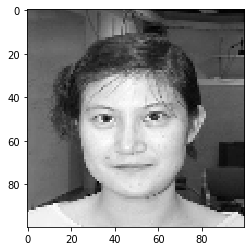

In [49]:
plt.imshow(x_train[0,:],cmap='gray')
plt.show()

In [0]:
y_train.value_counts()

In [0]:
y=pd.get_dummies(y_train).values

In [22]:
y.shape

(1671, 8)

In [0]:
x_train_norm=x_train/255.

In [24]:
x_train_norm.shape

(1671, 100, 100, 1)

In [0]:
from sklearn.model_selection import  train_test_split
train_x,valid_x,train_label,valid_label=train_test_split(x_train_norm,y,test_size=0.3,random_state=101)

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

Using TensorFlow backend.


In [0]:
classifier=Sequential()
classifier.add(Convolution2D(64,kernel_size=(3,3),input_shape=(100,100,1),padding='same',activation='relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Convolution2D(128,kernel_size=(3,3),input_shape=(100,100,1),padding='same',activation='relu'))
classifier.add(MaxPooling2D(2,2))
classifier.add(Flatten())
classifier.add(Dense(500,activation='relu'))
classifier.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
classifier.add(Dense(num_classes,activation='softmax'))



In [0]:
classifier.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [0]:
num_classes=8

In [31]:
classifier.fit(x_train_norm,y,batch_size=40,epochs=15,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/15





1671/1671 [==============================] - 9s 5ms/step - loss: 1.2075 - acc: 0.6355
Epoch 2/15
1671/1671 [==============================] - 1s 852us/step - loss: 0.2195 - acc: 0.9312
Epoch 3/15
1671/1671 [==============================] - 1s 854us/step - loss: 0.0736 - acc: 0.9791
Epoch 4/15
1671/1671 [==============================] - 1s 853us/step - loss: 0.0346 - acc: 0.9934
Epoch 5/15
1671/1671 [==============================] - 1s 849us/step - loss: 0.0164 - acc: 0.9970
Epoch 6/15
1671/1671 [==============================] - 1s 858us/step - loss: 0.0170 - acc: 0.9982
Epoch 7/15
1671/1671 [==============================] - 1s 853us/step - loss: 0.0172 - acc: 0.9958
Epoch 8/15
1671/1671 [==============================] - 1s 855us/step - loss: 0.0127 - acc: 0.9982
Epoch 9/15
1671/1671 [==============================] - 1s 851us/step - loss: 0.0122 - acc: 0.9982
Epoch 10/

In [32]:
df_test.shape 

(1118, 10001)

In [0]:
x_test =df_test.drop('Labels',axis=1).values

In [0]:
y_test=df_test.Labels

In [0]:
x_test=x_test.reshape(-1,100,100,1)

In [0]:
x_test_norm=x_test/255.

In [0]:
y_test=pd.get_dummies(y_test).values

In [45]:
y_test

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [46]:
classifier.evaluate(x_test,y_test)

1118/1118 [==============================] - 0s 295us/step


[1.1653740141600752, 0.9257602855856388]

In [47]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               40000500  
_________________________________________________________________
dense_3 (Dense)              (None, 8)                